In [1]:
from auxilary.simplex import Simplex_CLASS as simplex 
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def noisyImageTest(img, noise, alpha):
    # Convert image to float [0, 1]
    image_array = img.astype(np.float32) / 255

    noise = (noise - noise.min()) / (noise.max() - noise.min())  # Normalize to [0, 1]

    # Blend noise with original image
    image_array = (1 - alpha) * image_array + alpha * noise[..., np.newaxis]

    # Convert back to uint8 [0, 255]
    image_array = (image_array * 255).astype(np.uint8)

    return image_array


In [3]:

path = "Dataset/test/0.png"
img = cv2.imread(path)
for iter in range(20):
        simplexObj = simplex()
        img_size = (1000, 1000)
        noise = simplexObj.rand_2d_octaves(img_size, 6, 0.6)
        noisyImage = noisyImageTest(img, noise, 0.3)
        cv2.imwrite("Dataset/sample/simpleNoise/"+str(iter)+".png", noisyImage)

In [58]:
noise = (noise - noise.min()) / (noise.max() - noise.min())  # Normalize to [0, 1]

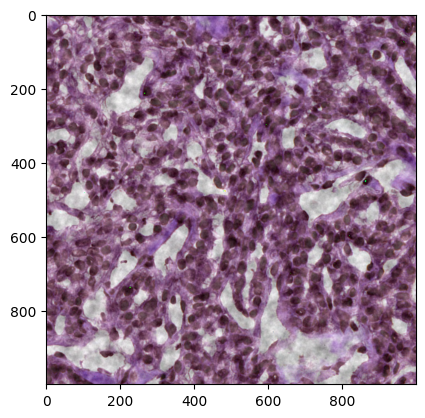

In [53]:
plt.imshow(noisyImage)

In [56]:
from opensimplex import OpenSimplex
import cv2
import numpy as np

def noisyImageTest(img, noise, alpha):
    # Convert image to float [0, 1]
    image_array = img.astype(np.float32) / 255

    # Blend noise with original image
    image_array = (1 - alpha) * image_array + alpha * noise[..., np.newaxis]

    # Convert back to uint8 [0, 255]
    image_array = (image_array * 255).astype(np.uint8)

    return image_array

def generate_noise(simplex, width, height):
    noise_array = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            noise_array[y, x] = simplex.noise2d(x, y)
    return (noise_array + 1) / 2

path = "Dataset/test/0.png"
img = cv2.imread(path)
img_size = (1000, 1000)

for iter in range(20):
    simplexObj = OpenSimplex(seed=np.random.randint(0, 10000))  # Reinitialize with a new seed
    noise = generate_noise(simplexObj, *img_size)
    noisyImage = noisyImageTest(img, noise, 0.3)
    cv2.imwrite("Dataset/sample/simpleNoise/"+str(iter)+".png", noisyImage*255)


ModuleNotFoundError: No module named 'opensimplex'


## Verifying Dataloader

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from auxilary.utils import *
from dataset import MonuSegDataSet, MonuSegValDataSet


In [20]:
def show_image(dataloader, img_type):

    for images, labels in dataloader:
        # Choose the first image in the batch
        image = images[0]

        # If the image is on the GPU, move it back to the CPU
        image = image.cpu().numpy()

        # If the image has 3 channels, transpose it to (height, width, channels)
        if image.shape[0] == 3:
            image = np.transpose(image, (1, 2, 0))
            #image = image*255
            # If the image is normalized, transform it back to the (0, 1) range
            #image = unnormalize_image(image)
        else:
            image = np.transpose(image, (1, 2, 0))
            image = image*255

        # Convert one-hot encoded image to single image
        label = np.transpose(labels[0], (1, 2, 0))
        label = np.argmax(label, axis=-1)
        
        label = label*(255/2)

        # Plot the image
        f, ax = plt.subplots(1,2)
        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[1].imshow(label)
        #plt.title(f"Label: {labels[0]}")
        #plt.axis('off')

        print(image)

        # Break after the first batch (remove this line if you want to see more)
        break

In [28]:
def main():
    # Load config
    config = readConfig()
    train_dataset = MonuSegDataSet(config["trainDataset"])
    train_data = DataLoader(train_dataset,batch_size=config["batch_size"],shuffle=True)

    val_dataset = MonuSegValDataSet(config["valDataset"])
    val_data = DataLoader(val_dataset,batch_size=1,num_workers=4)
    

    show_image(val_data, config["input_img_type"])


[[[0.47843137 0.4117647  0.4627451 ]
  [0.42352942 0.34117648 0.43137255]
  [0.4745098  0.3647059  0.4509804 ]
  ...
  [0.5529412  0.4627451  0.54901963]
  [0.52156866 0.4392157  0.5294118 ]
  [0.49803922 0.40784314 0.48235294]]

 [[0.5058824  0.40784314 0.52156866]
  [0.46666667 0.37254903 0.44705883]
  [0.53333336 0.42352942 0.5019608 ]
  ...
  [0.5647059  0.49019608 0.5686275 ]
  [0.54509807 0.4627451  0.5294118 ]
  [0.5019608  0.44705883 0.5019608 ]]

 [[0.5019608  0.43137255 0.48235294]
  [0.53333336 0.4509804  0.54509807]
  [0.62352943 0.5411765  0.60784316]
  ...
  [0.5882353  0.5019608  0.59607846]
  [0.5411765  0.4627451  0.54901963]
  [0.50980395 0.44313726 0.5058824 ]]

 ...

 [[0.8901961  0.8627451  0.8352941 ]
  [0.87058824 0.8156863  0.8117647 ]
  [0.87058824 0.8235294  0.827451  ]
  ...
  [0.6666667  0.5686275  0.6627451 ]
  [0.6862745  0.5647059  0.6509804 ]
  [0.68235296 0.54509807 0.6431373 ]]

 [[0.87058824 0.84705883 0.827451  ]
  [0.6901961  0.654902   0.7176471 ]


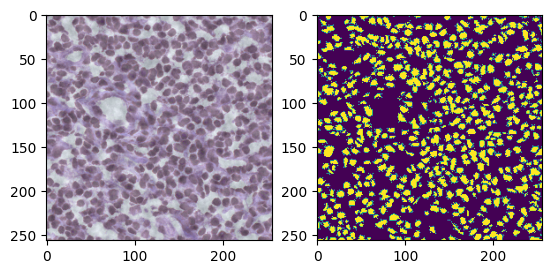

In [29]:
main()

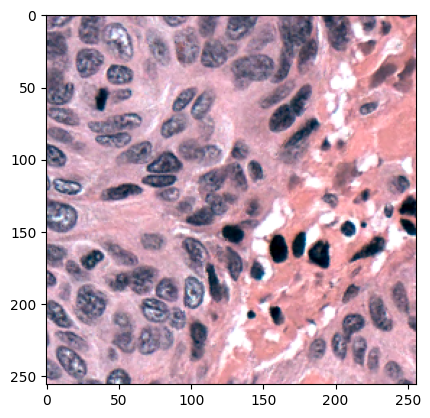

In [35]:
path = "Dataset/trainNormal/0.png"
img = cv2.imread(path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img/255)


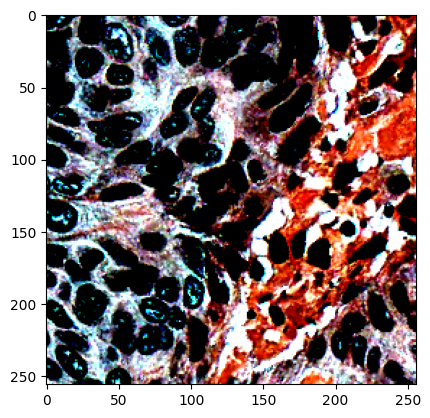

In [41]:
plt.imshow(normalize_image(img/255))

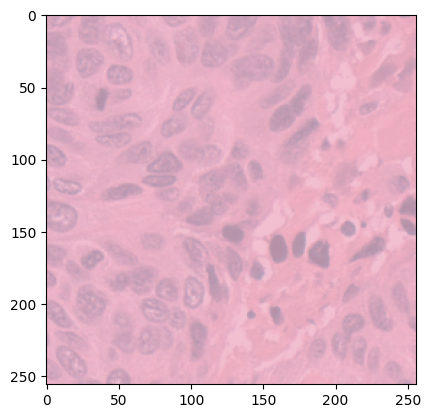

In [40]:
plt.imshow(unnormalize_image(img/255))